<a href="https://colab.research.google.com/github/jstangelbellarmine/MLA_JRS/blob/main/FinalProject_Classification_JRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Machine Learning Final Project, Classification

###CS-430-ON

John Stangel

##Ensemble Methods

All Imports brought in from Assignment 5's notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Connect to Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This section confirms I have all files needed

In [3]:
import os
os.listdir('/content/drive/MyDrive')

['Colab Notebooks',
 'weather_2012.csv',
 'Untitled document.gdoc',
 'March 2025 (6 Calendar Page).gdoc',
 'GaiaEye.zip',
 'buckthornImg.jpg',
 'Steel_industry_data.csv',
 'banknote_authentication.csv',
 'Untitled0.ipynb',
 'SkokieBuckthorn.jpg',
 'SkokieB.JPG',
 'Google Earth',
 'landsat_train.csv',
 'landsat_test.csv',
 'Malta.gdoc',
 'AirQualityUCI.csv',
 'iris.zip',
 'letter+recognition.zip',
 'FinalProject_Regression_JRS.ipynb',
 'best.pt',
 'Gaia_Eye_Train_Test.ipynb',
 'Gaia_Eye_Detection_Mapping.ipynb',
 'Drone1.jpg',
 'TestImages',
 'Gaia_Eye_Detector.ipynb',
 'FotoMapper.ipynb',
 'photo_location.kml']

Imports for Ensemble Learning and Random Forests


##Imports for specific models, from [starter code](https://github.com/r2klabs/CS430Repository.git) provided by Bellarmine University.

This section imports the models from SKLearn.

In [4]:
from sklearn.svm import SVC, SVR
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

#I Added the next two to evaluate my models and to perofrm the GridSearch pipeline for question 2.
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix



##Other Classifier

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay


###Imports for Splitting Data and Building Pipeline

In [6]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')
from sklearn.linear_model import LinearRegression

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [7]:
from sklearn import set_config
set_config(display='diagram')

###Imports for Performance Measures

In [8]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

###Confusion Matrix Function

This function is for creating a graphical version of the confusion matrix.

In [9]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

ROC_Curve Function
This function is for plotting the roc_curve

In [10]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

This section imports the code needed for data trees.

In [11]:
from sklearn import tree
from sklearn.tree import export_text
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

##Problem 2

###I Chose a data set based on [Irises](https://archive.ics.uci.edu/dataset/53/iris), a type of flower.

This section imports the library needed to unzip the data file.

In [12]:
import zipfile


This code selects the locatio of the zip file.  

In [13]:
zip_path = "/content/drive/MyDrive/iris.zip"

This section creates a folder to send the data into

In [14]:
extract_folder = "/content/classification_dataset"
os.makedirs(extract_folder, exist_ok=True)

This code unzips the file and dumps its contents into the folder we just created

In [15]:
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

This section is to confirm the data extraction worked.

In [16]:
os.listdir(extract_folder)

['iris.data', 'Index', 'iris.names', 'bezdekIris.data']

this assigns the names to each column

In [17]:
column_names = ['sepal_lngth', 'sepal_wdth', 'petal_lngth', 'petal_wdth', 'class']

This creates the data frame for the desires file.

In [18]:
iris_path = "/content/classification_dataset/iris.data"
df = pd.read_csv(iris_path, header=None, names=column_names)

This section only counts cells with data in them.

In [19]:
df = df.dropna()

In [20]:
#this is here to make sure the unzipping, uploading, and labeling worked fine.
#df.head()


this section prints off the data

In [21]:
print("Summary stats:")
print(df.describe())

Summary stats:
       sepal_lngth  sepal_wdth  petal_lngth  petal_wdth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


This Section shows the counts

In [22]:
print("\nClass counts:")
print(df['class'].value_counts())


Class counts:
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


This section generates plot diagrams

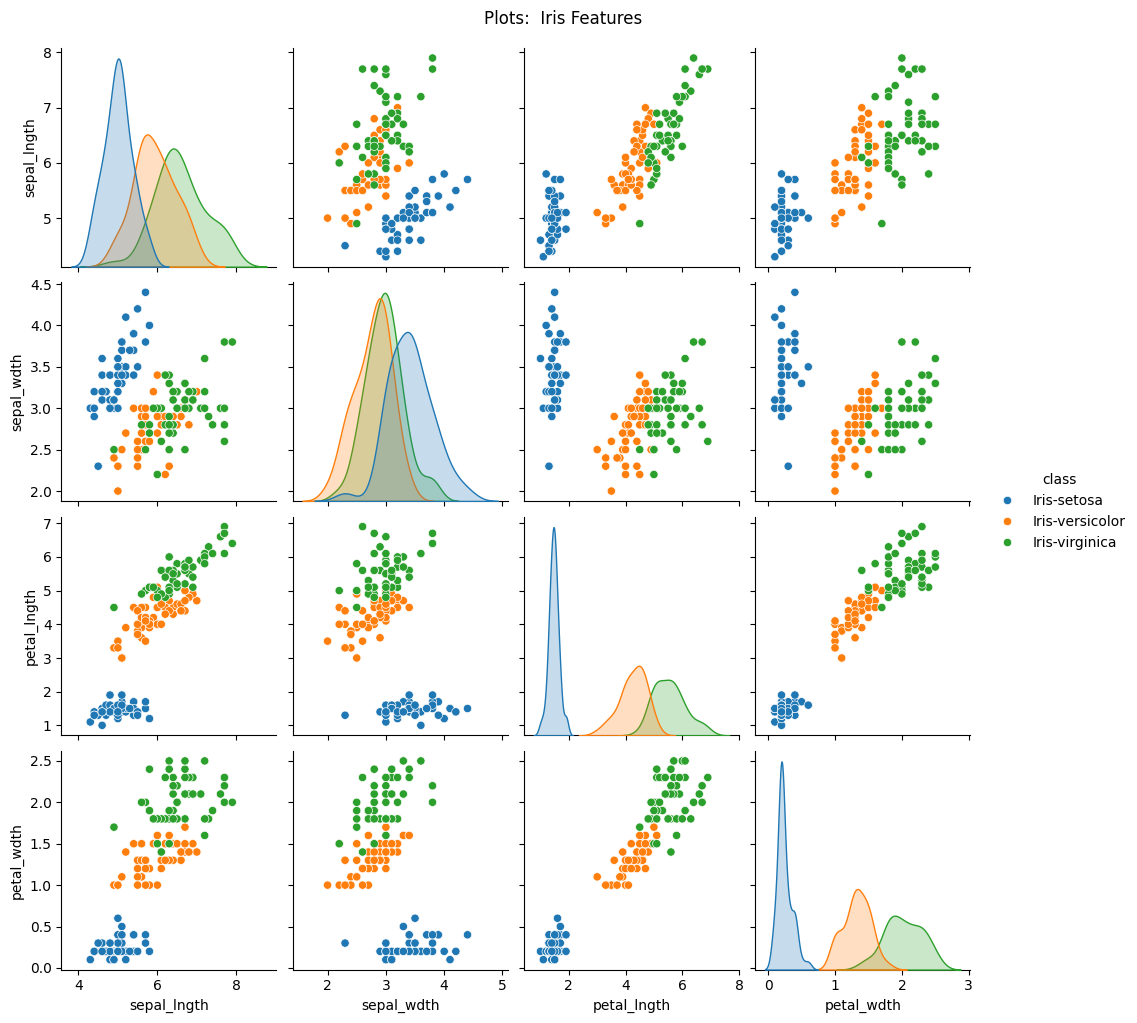

In [23]:
sns.pairplot(df, hue='class')
plt.suptitle("Plots:  Iris Features", y=1.02)
plt.show()

This section splits the data into x and y, and designates y to be class.

In [24]:
X = df.drop('class', axis=1)
y = df['class']

This section splits the data at a 20/80 for testing and training

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=83
    )

prints the variable shapes

In [26]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (120, 4)
y_train shape: (120,)


This creates the pipeline

In [27]:
log_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
    ])

This section fits the pipeline onto the model

In [28]:
log_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('logreg', LogisticRegression(max_iter=1000))])

This formulates the predictions

In [29]:
y_pred_log = log_pipeline.predict(X_test)

This section shows the evaluations

In [30]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



This sections shows a  confucsion matrix.

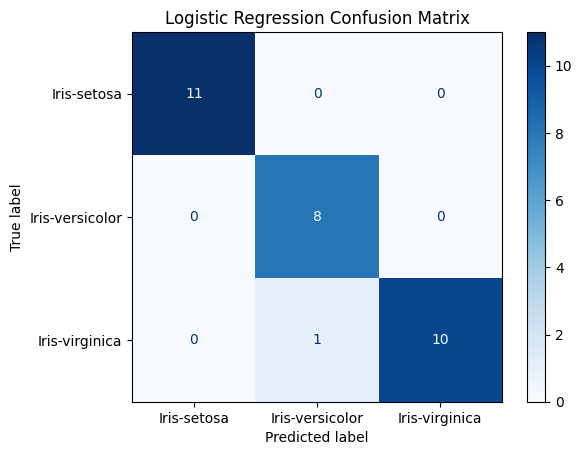

In [31]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

###Decision Tree Classifier

I chose my second model to be a decision tree.

In [32]:
tree_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('tree', DecisionTreeClassifier(random_state=23))
    ])

This section trainst he pipeline.

In [33]:
tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('tree', DecisionTreeClassifier(random_state=23))])

This section generates predictions.

In [34]:
y_pred_tree = tree_pipeline.predict(X_test)

This section shows the evaluation scores

In [35]:
print("Report on Decision Tree Model:")
print(classification_report(y_test, y_pred_tree))

Report on Decision Tree Model:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.73      1.00      0.84         8
 Iris-virginica       1.00      0.73      0.84        11

       accuracy                           0.90        30
      macro avg       0.91      0.91      0.89        30
   weighted avg       0.93      0.90      0.90        30



This section created a confusion matrix for the decision tree

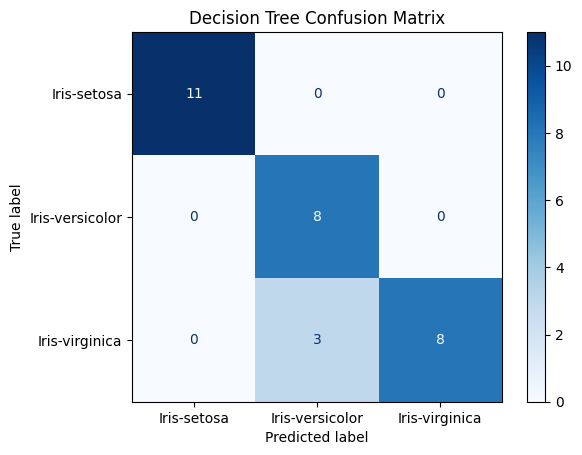

In [36]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

This section creates a GridSearch pipeline.


In [37]:
tree_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('tree', DecisionTreeClassifier(random_state=12))
    ])


This section performs the GridSearch pipeline, including code to measure performance.

In [38]:
param_grid = {
    'tree__max_depth': [3, 4]
    }
grid_search_tree = GridSearchCV(tree_pipeline, param_grid, cv=3)
grid_search_tree.fit(X_train, y_train)
best_tree = grid_search_tree.best_estimator_

This section prints off the effectiveness of the regression model.

In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision (macro):", precision_score(y_test, y_pred_log, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_log, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_log, average='macro'))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_log))

Accuracy: 0.9666666666666667
Precision (macro): 0.9629629629629629
Recall (macro): 0.9696969696969697
F1 Score (macro): 0.9645191409897292
Confusion Matrix:
[[11  0  0]
 [ 0  8  0]
 [ 0  1 10]]


This calculates the predictions for the decision tree model

In [40]:
y_pred_tree = best_tree.predict(X_test)

This section prints off the effectiveness of the decision tree model.

In [41]:
print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision (macro):", precision_score(y_test, y_pred_tree, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_tree, average='macro'))
print("F1 Score (macro):", f1_score(y_test, y_pred_tree, average='macro'))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tree))

Accuracy: 0.9
Precision (macro): 0.9090909090909092
Recall (macro): 0.9090909090909092
F1 Score (macro): 0.8947368421052632
Confusion Matrix:
[[11  0  0]
 [ 0  8  0]
 [ 0  3  8]]


##Final Thoughts

Both models are excellend choices for classifying Iris data, however regression is better than the decision tree on all metrics, especially F1, where it leads by over .05, which may seem trivial but can make a very big difference.